**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf, OLS
plt.style.use('seaborn')

In [54]:
Z = pd.read_csv("epc9dat.txt", sep=" ", header=None)
Z = Z[[3,6]].rename(columns={3:'y',6:'x'})
Z.head()

,y,x
0,24.615091,344.47342
1,24.615091,344.76187
2,24.615091,344.66571
3,24.602808,344.40930
4,24.602808,344.56952


# Questão 1

**1.1**

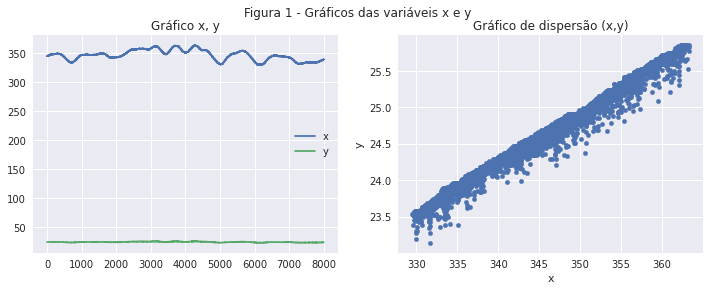

In [56]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
Z[['x','y']].plot(ax=ax[0])
Z.plot(kind='scatter',x='x',y='y', ax=ax[1])
ax[0].set_title("Gráfico x, y")
ax[1].set_title("Gráfico de dispersão (x,y)")
plt.suptitle("Figura 1 - Gráficos das variáveis x e y");

A Figura $1$, no gráfico de x,y (à esquerda) mostra que, se analisadas separadamente, as variáveis $x$ e $y$ são muito diferentes: os valores da variável $x$ são muito maiores que os da variável $y$ e, visualmente, $x$ varia mais que $y$ ao longo das amostras.

No gráfico da direita, entretanto, o gráfico da dispersão entre $x$ e $y$ indica que pode haver uma correlação positiva entre as duas variáveis, pois para maiores valores de $x$ temos também maiores valores de $y$. Visualmente, podemos verificar a existência de uma "reta" na diagonal do gráfico.

**1.2**

In [57]:
c1,pvalue = pearsonr(Z['x'],Z['y'])
c1, pvalue

(0.9937339736311894, 0.0)

Usando a totalidade dos dados a correlação entre $x$ e $y$ é $0.993$, um valor muito próximo de $1$, com um $P-$ value $=0.0$ < $0.05$, ou seja, as variáveis possuem uma correlação significativamente diferente de $0$.

In [58]:
Z_500 = Z.sample(500)
c2,pvalue = pearsonr(Z_500['x'],Z_500['y'])
c2, pvalue, c1-c2

(0.9931704655874978, 0.0, 0.0005635080436916517)

Usando $500$ pares $(x,y)$ selecionados aleatoriamente, temos uma correlação de $\approx 0.992$, apenas cerca de $1$ milésimo de diferença entre uma correlação em outra. Além disso, o $P-$ value ainda é $0$, indicando que a correlação entre as duas variáveis ainda é significativamente diferente de $0$.

# Questão 2

**2.1**

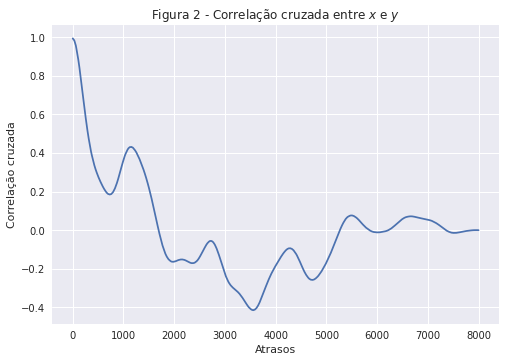

In [59]:
crus_corr = ccf(Z['x'],Z['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 2 - Correlação cruzada entre $x$ e $y$");

**2.2**

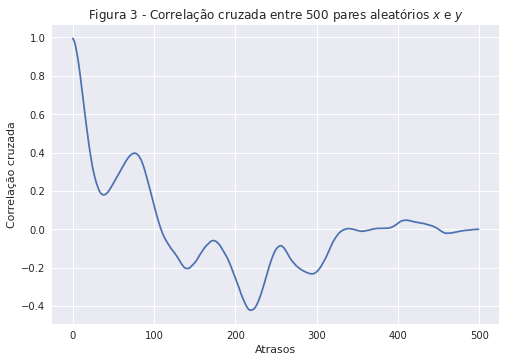

In [60]:
Z_500 = Z.sample(500)
Z_500.sort_index(inplace=True) # ordena
crus_corr = ccf(Z_500['x'],Z_500['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 3 - Correlação cruzada entre 500 pares aleatórios $x$ e $y$");

Os gráficos de correlação versus atrasos tanto na Figura $2$ quanto na Figura $3$ são bem parecidos, visualmente: as correlações aumentam e diminuem diversas vezes para diferentes atrasos, mas estabilizam-se próximo de $0.0$ quando o atraso considera o tamanho total das variáveis.

Além disso, nota-se na Figura $2$ que há uma correlação positiva forte para atrasos maiores que $0$, indicando que é possível prever valores futuros de $y$ apartir de valores de $x$. Essa suposição é confirmada pela Figura $3$ onde, mesmo com valores selecionados aleatoriamente, tem-se correlação positiva para atrasos maiores que $0$. Desta forma, é possível afirmar que conseguimos obter um bom modelo de regressão para $X$ e $Y$.

# Questão 3

**3.1**

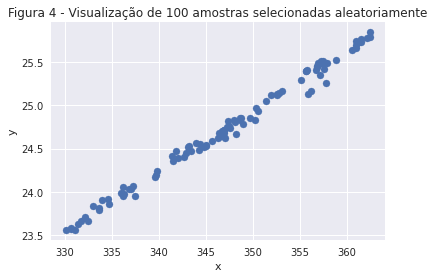

In [61]:
# seleciono 100 amostras
# random_state é usado para fins de reprodutibilidade
Z_100 = Z.sample(100, random_state=42)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Z_100['x'], Z_100['y'])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title(("Figura 4 - Visualização de 100 amostras selecionadas aleatoriamente"));

O código a seguir calcula a $\beta_0$ e $\beta_1$ para os valores de $x$ e $y$ selecionados. 

OBS: se o objetivo for obter apenas $\beta_0$ e $\beta_1$, podemos fazer o produto escalar de $y$ pela pseudo-inversa de $x$. Outros resultados podem ser obtidos com a biblioteca [OLS](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html).

In [62]:
betas_0 = []
betas_1 = []
# percorre todos pares
for xi, yi in Z_100.values:    
    x = np.array([xi])
    y = np.array([yi])    
    A = np.vstack([x, np.ones(len(x))]).T
    pinv = np.linalg.pinv(A) # pseudo-inversa
    b1, b0 = pinv.dot(y) # produto escalar
    betas_0.append(b0)
    betas_1.append(b1)    

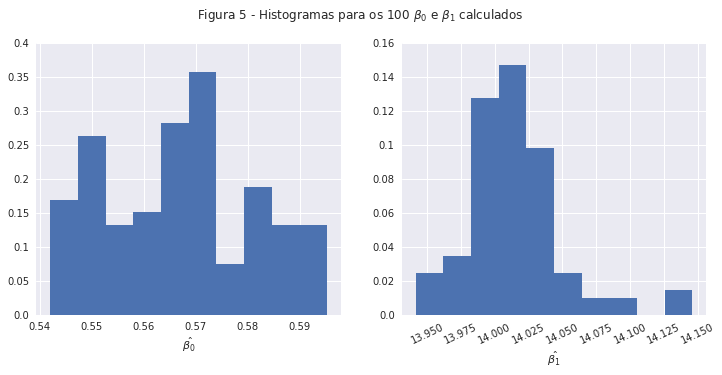

In [64]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].hist(betas_0, density=True)
locs_0 = ax[0].get_yticks()
ax[0].set_yticks(locs_0,np.round(locs_0/len(betas_0),3))
ax[0].set_xlabel(r'$\hat{\beta_0}$')
ax[1].hist(betas_1, density=True)
locs_1 = ax[1].get_yticks()
ax[1].set_yticks(locs_1,np.round(locs_1/len(betas_1),3))
ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r"Figura 5 - Histogramas para os 100 $\beta_0$ e $\beta_1$ calculados")
plt.xticks(rotation=25);

**3.2**

Para o cálculo da média e desvio padrão usamos o $\beta_0$ e $\beta_1$ obtidos da regressão dos dados.

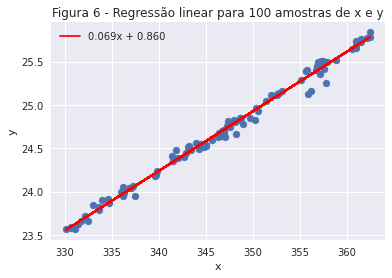

In [65]:
X = Z_100['x'].values
Y = Z_100['y'].values
A = np.vstack([X, np.ones(len(X))]).T
pinv = np.linalg.pinv(A)
b1, b0 = pinv.dot(Y)
y_hat = [(b0 + b1*xi) for xi in X]
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(X, y_hat, c='r', label='{:.3f}x + {:.3f}'.format(b1, b0))
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title("Figura 6 - Regressão linear para 100 amostras de x e y")
plt.legend();

A média de $E(B_1) = B_1$

A variância de $\hat{\beta_1}$: $V(\hat{\beta_1}) = \frac{\sigma^2}{S_{xx}}$

In [42]:
def calc_Sxx(X):
    sxx = np.power(X - np.mean(X), 2).sum()
    return sxx
def calc_SSe(y, y_hat):
    sse = np.power(np.array(y) - np.array(y_hat), 2).sum()
    return sse

In [66]:
sxx = calc_Sxx(X)
sse = calc_SSe(Y, y_hat)
sigma2 = sse/(100-2)
varb1 = sigma2/sxx
b1, varb1

(0.06876010963253867, 4.067867573021748e-07)

Média de $\beta_1 \approx 0.07$. Variância de $b1 \approx 4.07e-07$

De forma similar, $E(\hat{\beta_0}) = \beta_0$ e $V(\hat{\beta_0}) = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}]$

In [67]:
varb0 = sigma2 * (1/100 + (np.mean(X)**2)/sxx)
b0, varb0

(0.8604245082331659, 0.049084129989538046)

Média de $\beta_0=0.86$ e variância de $\beta_0 \approx 0.05$

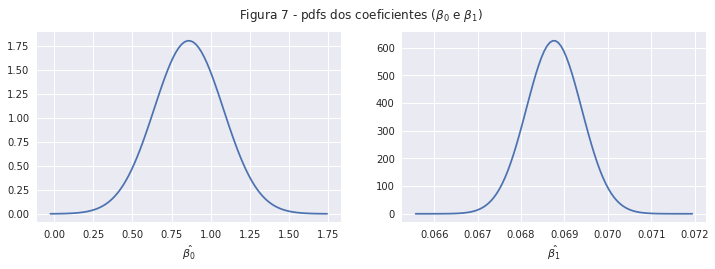

In [68]:
# pdf de b1
X_b1 = np.linspace(b1-5*np.sqrt(varb1), b1+5*np.sqrt(varb1), 100)
pdf_b1 = [norm.pdf(xi, loc=b1, scale=np.sqrt(varb1)) for xi in X_b1]

# pdf de b0
X_b0 = np.linspace(b0-4*np.sqrt(varb0), b0+4*np.sqrt(varb0), 100)
pdf_b0 = [norm.pdf(xi, loc=b0, scale=np.sqrt(varb0)) for xi in X_b0]

fig, ax = plt.subplots(figsize=(12, 3.5), ncols=2)
ax[0].plot(X_b0, pdf_b0)
ax[1].plot(X_b1, pdf_b1)
ax[0].set_xlabel(r'$\hat{\beta_0}$')
ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r'Figura 7 - pdfs dos coeficientes ($\beta_0$ e $\beta_1$)');

# Questão 4

**4.1**

In [48]:
# seleciono outras 100 amostras
Z_100_4 = Z.sample(100, random_state=44)

In [49]:
# A biblioteca Ordinary Least Squares (OLS) retorna diversos resultados, entre eles o IC
X_4, Y_4 = Z_100_4['x'], Z_100_4['y']
A = np.vstack([X_4, np.ones(len(X_4))]).T
mod = OLS(Y_4, A)
# x1=b1, const=b0
res = mod.fit()

In [50]:
df_IC = res.conf_int(0.05)
df_IC

,0,1
x1,0.068399,0.071410
const,-0.068826,0.973748


In [52]:
ci_b1 = df_IC.loc['x1'].values
ci_b0 = df_IC.loc['const'].values

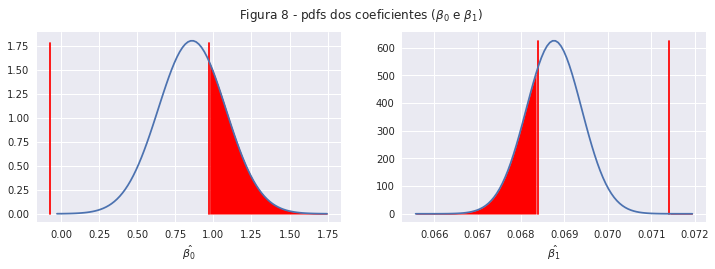

In [69]:
fig, ax = plt.subplots(figsize=(12, 3.5), ncols=2)
li_b0, ls_b0 = np.min(pdf_b0), np.max(pdf_b0)
li_b1, ls_b1 = np.min(pdf_b1), np.max(pdf_b1)

o_xb0, o_yb0 = [ci_b0[0], ci_b0[0]], [li_b0, ls_b0-0.02]
t_xb0, t_yb0 = [ci_b0[1], ci_b0[1]], [li_b0, ls_b0-0.02]
ax[0].plot(o_xb0, o_yb0, t_xb0, t_yb0, color='red')
ax[0].plot(X_b0, pdf_b0)
ax[0].set_xlabel(r'$\hat{\beta_0}$')
ax[0].fill_between(X_b0, pdf_b0, where=(X_b0>ci_b0[1]), color='red')
ax[0].fill_between(X_b0, pdf_b0, where=(X_b0<ci_b0[0]), color='red')

o_xb1, o_yb1 = [ci_b1[0], ci_b1[0]], [li_b1, ls_b1-0.02]
t_xb1, t_yb1 = [ci_b1[1], ci_b1[1]], [li_b1, ls_b1-0.02]
ax[1].plot(o_xb1, o_yb1, t_xb1, t_yb1, color='red')
ax[1].plot(X_b1, pdf_b1)
ax[1].fill_between(X_b1, pdf_b1, where=(X_b1>ci_b1[1]), color='red')
ax[1].fill_between(X_b1, pdf_b1, where=(X_b1<ci_b1[0]), color='red')

ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r'Figura 8 - pdfs dos coeficientes ($\beta_0$ e $\beta_1$)');

In [71]:
ci_b0

array([-0.06882585,  0.97374849])

In [72]:
ci_b1

array([0.06839916, 0.07140989])

A Figura $8$ mostra os intervalos de confiança (IC) para $\beta_0$ (esquerda) e $\beta_1$ (direita). Nota-se que para o $\beta_0$, o IC é $[-0.06, 0.97]$. Quando comparado com o pdf correspondente ao $\beta_0$ vemos que apenas o lado direito da distribuição possui valores na região crítica do IC (valores de $\beta_0>0.97$).

De forma similar, o IC do $\beta_1$ é $[0.06, 0.07]$, e apenas o lado esquerdo da distribuição possui valores na região crítica do IC (valores de $\beta_1<0.07$)

**4.2**

O código a seguir gera uma sumarização de diversas informações sobre o modelo de regressão.

In [73]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8492.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           5.15e-97
Time:                        18:56:52   Log-Likelihood:                 134.84
No. Observations:                 100   AIC:                            -265.7
Df Residuals:                      98   BIC:                            -260.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0699      0.001     92.153      0.000       0.068       0.071
const          0.4525      0.263      1.722      0.088      -0.069       0.974
==============================================================================
Omnibus:                       82.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.544
Skew:                          -2.657   Prob(JB):                    1.11e-145
Kurtosis:                      14.488   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para concluir se o modelo é bom, podemos utilizar o $R^2$, teste de hipótese de $\beta_1$ ($t$) e o $P$-valor, da tabela de sumarização anterior:

- $R^2 = 0.98$ (muito próximo de $1.0$)
- $t = 92.15$ (teste estatístico hipótese alto, bem maior que $0$, rejeita a hipótese nula de que $\beta_1 = 0$)
- $P$-valor $=0.000$ (igual a $0$, reforçando que a hipótese nula deve ser rejeitada)

# Questão 5

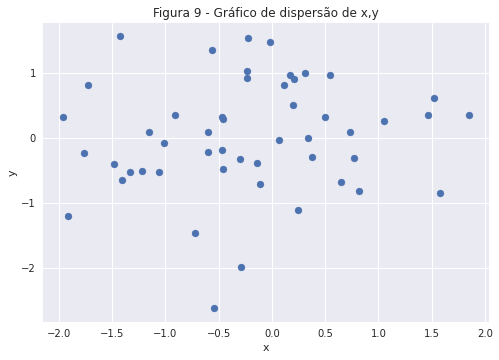

In [87]:
# geração das variáveis aleatórias
np.random.seed(42) # para fins de reprodutibilidade
X_5 = np.random.normal(loc=0, scale=1, size=50)
Y_5 = np.random.normal(loc=0, scale=1, size=50)
plt.scatter(X_5, Y_5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figura 9 - Gráfico de dispersão de x,y");

**5.1**

Um dos principais indicadores quantitativos de que é possível obter (ou não) um bom modelo de regressão linear entre $X$ e $Y$ é o coeficiente de correlação:

In [32]:
coef, pvalue = pearsonr(X_5, Y_5)
coef,pvalue

(0.11007178534016059, 0.4466835959411784)

em dados correlacionados, onde é possível obter um bom modelo, a correlação entre as duas variáveis será próxima de $1$. Entretanto, o código acima mostra que a correlação entre as duas variáveis é $0.11$, com um $P$-value $=0.44$, ou seja, provavelmente não conseguimos obter um bom modelo de regressão linear entre $X$ e $Y$.

**5.2**

In [88]:
# adiciona o termo da constante b0
X_5 = sm.add_constant(X_5)
mod = OLS(Y_5, X_5)
res = mod.fit()

A tabela à seguir apresenta alguns resultados importantes obtidas do modelo ajustado aos dados:

In [89]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5887
Date:                Tue, 05 Jul 2022   Prob (F-statistic):              0.447
Time:                        19:28:36   Log-Likelihood:                -63.422
No. Observations:                  50   AIC:                             130.8
Df Residuals:                      48   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0410      0.128      0.321      0.750      -0.216       0.298
x1             0.1031      0.134      0.767      0.447      -0.167       0.373
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.563
Skew:                          -0.464   Prob(JB):                        0.278
Kurtosis:                       3.608   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Um dos primeiros resultados que pode indicar se o modelo é bom ou não é o $R^2$ (R-squared), que indica a porcentagem de variação em $Y$ que é explicada por $X$. Assim, um bom modelo teria o $R^2$ próximo de 1.0 ($100\%$) mas, para as variáveis definidas, $R^2=0.012$ (menos de $1\%$ da variação de $Y$ é explicado por $X$).

Outro resultado que pode ser utilizado é o do teste de hipótese ($t$-test) para $\beta_1$ (representado por x1), onde temos as hipóteses:

$H_0: \beta_1 = 0$ ($X$ não possui influência em $Y$)

$H_1: \beta_1 \ne 0$ ($X$ tem uma influência significante em $Y$)

Pelos resultados da tabela acima, nota-se que o teste de hipótese para $\beta_1=0.321$, com um $P$-value $=0.447$, ou seja, não conseguimos rejeitar $H_0$ a hipótese nula de que $X$ não possui influência em $Y$.

Por fim, podemos analisar o intervalo de confiança do modelo ajustado aos dados:

In [90]:
res.conf_int(0.05)[0]

array([-0.2159609 ,  0.29800438])

Para um nível de confiança de $95\%$, tem-se que o intervalo de confiança é $[-0.21, 0.29]$. Como o $0$ está entre os limites inferior ($-0.21$) e superior ($0.29$), não conseguimos rejeitar a hipótese nula definida anteriormente e, $X$ provavelmente não deve ter influência em $Y$.

Desta forma, unindo esse $3$ resultados, podemos afirmar que o modelo ajustado aos dados não é bom.